**BrainStation Capstone Project**

**Author: Lynn Ho**

# **Crafting the Perfect Beer:** Predicting Beer Ratings with Sentiment Analysis and Clustering

## Part II: Machine Learning Classifiers

---

## Introduction

This notebook requires a boosting environment that was set up by running the following commands in the terminal (MacOS):

1. `conda create -n boosting python=3.8 numpy pandas matplotlib seaborn statsmodels scikit-learn=0.24.1 jupyter jupyterlab`

2. `conda activate boosting`

3. `conda install -c conda-forge xgboost=1.1.1`

Predicting whether a review is good or bad is a classification problem, and for this project, I will be using the following machine learning techniques:

**Logistic Regression**
- Logistic Regression is one of the most commonly used machine learning algorithms used to predict a categorical dependent variable. We can use it to look at how the features affect the odds of our target variable (the beer `rating`), will be either 1 ('good') or 0 ('bad'). 

**Decision Tree**
- Decision Trees work by identifying ways to split the dataset based on various conditions and can be used for both classification and regression tasks. They can ignore features that are of less importance since they learn by finding the feature split which provides the most information gain, but tend to overfit if not tuned.

**XGBoost**
- XGBoost is an implementation of Gradient Boosting that combines predictions from several Decision Tree models into one. It fits one model at a time and models subsequent ones based on its predecessor’s error, which gives more weight to predictors that perform better.

I will test all three models by using them out-of-the-box first and then tuning the hyperparameters to improve the model performances. All three will finally be compared based on the performance metrics of accuracy, recall, precision, and f1 score. The important features for each model will also be compared.

Before the models can be built, I need to first do some data preprocessing to prepare it for modelling. 

---

## Data Preprocessing

Let's first import the tools that will be used.

In [1]:
# trinity 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# seaborn
import seaborn as sns

# scalers
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# logistic regression
from sklearn.linear_model import LogisticRegression

# decision tree
from sklearn.tree import DecisionTreeClassifier

# xgboost
from xgboost import XGBClassifier

I also need to read in the file that was exported from the `beer_cleaning_EDA` notebook. This is the `beer_sample_cleaned.csv` file that can be downloaded <a href="https://drive.google.com/file/d/105_ToiDUQCiGLWTjEPsimHPx7SrnPB1I/view?usp=sharing">here</a>.

In [2]:
# read in data

sample_df = pd.read_csv('data/beer_sample_cleaned.csv')

In [3]:
# look at the first few rows

pd.options.display.max_columns=200
sample_df.head()

,look,smell,taste,feel,overall,score,year,month,weekday,abv,retired,Beer-to-go,Brewery,Eatery,Homebrew,Bar,Fall,Limited (brewed once),Rotating,Summer,Winter,Year-round,IPA,bock,brown ale,dark ale,dark lager,pale ale,pale lager,porter,specialty,stout,strong ale,wheat,wild/sour,aaroma,abbey,able,abound,abrasive,absent,absolute,absolutely,absurd,abundance,abundant,abv.1,abyss,accent,accented,accentuate,acceptable,access,accessible,accompanied,accompany,accompanying,according,account,acetic,achieve,acid,acidic,acidity,acquired,acre,acrid,across,act,action,active,actual,actually,adam,add,added,adding,addition,additional,additive,adequate,adequately,adjunct,admit,admittedly,advertised,advocate,affair,affordable,aforementioned,afternoon,aftertaste,afterthought,afterwards,age,aged,aggressive,aggressively,aging,ago,...,whoa,whole,wicked,wide,width,wife,wild,wildflower,willi,willing,win,window,wine,winelike,winey,wing,winner,winter,wisconsin,wise,wish,wisp,wispy,wit,witbier,within,without,wonder,wonderful,wonderfully,wondering,wont,won’t,wood,woodiness,woodsy,woody,woodychandler,word,work,worked,working,world,worldclass,worried,worse,worst,worth,worthy,would,wouldnt,wouldn’t,wouldve,wow,wrap,wrapped,write,writing,written,wrong,x,ya,yarchives,yard,yeah,year.1,yeast,yeastiness,yeastoak,yeasty,yellow,yellowgold,yellowish,yelloworange,yep,yes,yesterday,yet,yield,yielded,ymmv,yogurt,york,youd,youll,young,youre,youve,you’re,yuengling,yum,yummy,yuzu,zero,zest,zesty,zing,zip,zippy,zone
0,4.00,3.75,3.75,4.0,4.00,3.84,2017,2,5,4.20,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.00,2.75,2.50,4.0,2.50,2.80,2018,6,5,6.40,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.00,4.00,4.00,4.0,4.25,4.05,2017,10,6,6.50,0,1,1,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.50,5.00,4.75,4.5,4.75,4.77,2018,8,6,6.75,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [4]:
# get shape

sample_df.shape

(44506, 3682)

The data was read in properly and has 44,506 rows and 3,682 columns. Because I will be modifying the dataset to build the models, I will make a copy of the original dataset first.

In [5]:
# create copy
model_df = sample_df.copy()

# check
model_df.head()

,look,smell,taste,feel,overall,score,year,month,weekday,abv,retired,Beer-to-go,Brewery,Eatery,Homebrew,Bar,Fall,Limited (brewed once),Rotating,Summer,Winter,Year-round,IPA,bock,brown ale,dark ale,dark lager,pale ale,pale lager,porter,specialty,stout,strong ale,wheat,wild/sour,aaroma,abbey,able,abound,abrasive,absent,absolute,absolutely,absurd,abundance,abundant,abv.1,abyss,accent,accented,accentuate,acceptable,access,accessible,accompanied,accompany,accompanying,according,account,acetic,achieve,acid,acidic,acidity,acquired,acre,acrid,across,act,action,active,actual,actually,adam,add,added,adding,addition,additional,additive,adequate,adequately,adjunct,admit,admittedly,advertised,advocate,affair,affordable,aforementioned,afternoon,aftertaste,afterthought,afterwards,age,aged,aggressive,aggressively,aging,ago,...,whoa,whole,wicked,wide,width,wife,wild,wildflower,willi,willing,win,window,wine,winelike,winey,wing,winner,winter,wisconsin,wise,wish,wisp,wispy,wit,witbier,within,without,wonder,wonderful,wonderfully,wondering,wont,won’t,wood,woodiness,woodsy,woody,woodychandler,word,work,worked,working,world,worldclass,worried,worse,worst,worth,worthy,would,wouldnt,wouldn’t,wouldve,wow,wrap,wrapped,write,writing,written,wrong,x,ya,yarchives,yard,yeah,year.1,yeast,yeastiness,yeastoak,yeasty,yellow,yellowgold,yellowish,yelloworange,yep,yes,yesterday,yet,yield,yielded,ymmv,yogurt,york,youd,youll,young,youre,youve,you’re,yuengling,yum,yummy,yuzu,zero,zest,zesty,zing,zip,zippy,zone
0,4.00,3.75,3.75,4.0,4.00,3.84,2017,2,5,4.20,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.00,2.75,2.50,4.0,2.50,2.80,2018,6,5,6.40,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.00,4.00,4.00,4.0,4.25,4.05,2017,10,6,6.50,0,1,1,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.50,5.00,4.75,4.5,4.75,4.77,2018,8,6,6.75,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

First, I want to round the values in the `abv` column to just one decimal, since that is how ABV percentages are usually presented.

In [6]:
# round `abv` values to one decimal place
model_df['abv'] = model_df['abv'].round(decimals=1)

# check
model_df.head()

,look,smell,taste,feel,overall,score,year,month,weekday,abv,retired,Beer-to-go,Brewery,Eatery,Homebrew,Bar,Fall,Limited (brewed once),Rotating,Summer,Winter,Year-round,IPA,bock,brown ale,dark ale,dark lager,pale ale,pale lager,porter,specialty,stout,strong ale,wheat,wild/sour,aaroma,abbey,able,abound,abrasive,absent,absolute,absolutely,absurd,abundance,abundant,abv.1,abyss,accent,accented,accentuate,acceptable,access,accessible,accompanied,accompany,accompanying,according,account,acetic,achieve,acid,acidic,acidity,acquired,acre,acrid,across,act,action,active,actual,actually,adam,add,added,adding,addition,additional,additive,adequate,adequately,adjunct,admit,admittedly,advertised,advocate,affair,affordable,aforementioned,afternoon,aftertaste,afterthought,afterwards,age,aged,aggressive,aggressively,aging,ago,...,whoa,whole,wicked,wide,width,wife,wild,wildflower,willi,willing,win,window,wine,winelike,winey,wing,winner,winter,wisconsin,wise,wish,wisp,wispy,wit,witbier,within,without,wonder,wonderful,wonderfully,wondering,wont,won’t,wood,woodiness,woodsy,woody,woodychandler,word,work,worked,working,world,worldclass,worried,worse,worst,worth,worthy,would,wouldnt,wouldn’t,wouldve,wow,wrap,wrapped,write,writing,written,wrong,x,ya,yarchives,yard,yeah,year.1,yeast,yeastiness,yeastoak,yeasty,yellow,yellowgold,yellowish,yelloworange,yep,yes,yesterday,yet,yield,yielded,ymmv,yogurt,york,youd,youll,young,youre,youve,you’re,yuengling,yum,yummy,yuzu,zero,zest,zesty,zing,zip,zippy,zone
0,4.00,3.75,3.75,4.0,4.00,3.84,2017,2,5,4.2,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.00,2.75,2.50,4.0,2.50,2.80,2018,6,5,6.4,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.00,4.00,4.00,4.0,4.25,4.05,2017,10,6,6.5,0,1,1,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.50,5.00,4.75,4.5,4.75,4.77,2018,8,6,6.8,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

Next, I need to create a column that indicates whether the review was good or bad. I will use the `score` metric for this since it is the weighted average of all of the other metrics. Because the range of scores is between 1 and 5, I will assign all reviews that are 4 and above as good and anything below 4 is considered bad.

In [7]:
# assign 1 to scores that are 4 and 5 ('good') and 0 to scores under 4 ('bad')
model_df['rating'] = np.where(model_df['score'] >= 4, 1, 0)

# sanity check
model_df['rating'].value_counts()

1    26859
0    17647
Name: rating, dtype: int64

Let's visualize the distribution of the ratings.

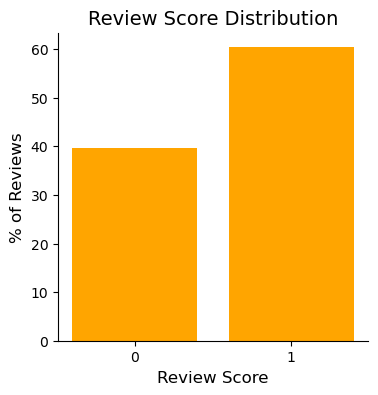

Review Score Distribution: [0.4 0.6]


In [8]:
# visualize score distribution

rating, counts = np.unique(model_df['rating'], return_counts=True)
rating_normalized_counts = counts/counts.sum()

plt.figure(figsize = (4, 4))
plt.bar(["0", "1"], rating_normalized_counts*100, color='orange')
plt.xlabel('Review Score', size = 12)
plt.ylabel('% of Reviews', size = 12)
plt.title("Review Score Distribution", size = 14)
sns.despine()
plt.show()

print(f"Review Score Distribution: {np.round(rating_normalized_counts, 2)}")

The distribution of good and bad reviews is a bit unbalanced, with 40% bad reviews and 60% good reviews. 

I will move on now to remove columns that won't be used for our machine learning models. These will include all of the individual rating metrics, `look`, `smell`, `taste`, `feel`, `overall`, and `score`. Also, since we are looking for features that influence the rating, I will remove `year` as well because the dataset only has reviews from 2017 and 2018.

In [9]:
# remove rating columns

model_df = model_df.drop(columns=['look', 'smell', 'taste', 'feel', 'overall', 'score', 'year'])
model_df.head()

,month,weekday,abv,retired,Beer-to-go,Brewery,Eatery,Homebrew,Bar,Fall,Limited (brewed once),Rotating,Summer,Winter,Year-round,IPA,bock,brown ale,dark ale,dark lager,pale ale,pale lager,porter,specialty,stout,strong ale,wheat,wild/sour,aaroma,abbey,able,abound,abrasive,absent,absolute,absolutely,absurd,abundance,abundant,abv.1,abyss,accent,accented,accentuate,acceptable,access,accessible,accompanied,accompany,accompanying,according,account,acetic,achieve,acid,acidic,acidity,acquired,acre,acrid,across,act,action,active,actual,actually,adam,add,added,adding,addition,additional,additive,adequate,adequately,adjunct,admit,admittedly,advertised,advocate,affair,affordable,aforementioned,afternoon,aftertaste,afterthought,afterwards,age,aged,aggressive,aggressively,aging,ago,agree,ah,ahead,ahh,aid,aint,aipa,...,whoa,whole,wicked,wide,width,wife,wild,wildflower,willi,willing,win,window,wine,winelike,winey,wing,winner,winter,wisconsin,wise,wish,wisp,wispy,wit,witbier,within,without,wonder,wonderful,wonderfully,wondering,wont,won’t,wood,woodiness,woodsy,woody,woodychandler,word,work,worked,working,world,worldclass,worried,worse,worst,worth,worthy,would,wouldnt,wouldn’t,wouldve,wow,wrap,wrapped,write,writing,written,wrong,x,ya,yarchives,yard,yeah,year.1,yeast,yeastiness,yeastoak,yeasty,yellow,yellowgold,yellowish,yelloworange,yep,yes,yesterday,yet,yield,yielded,ymmv,yogurt,york,youd,youll,young,youre,youve,you’re,yuengling,yum,yummy,yuzu,zero,zest,zesty,zing,zip,zippy,zone
0,2,5,4.2,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6,5,6.4,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10,6,6.5,0,1,1,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8,6,6.8,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

The columns were successfully dropped, so now I need to set the X and y variables for the models.

---

### Set X and y Variables

Our target variable (y) is the `rating` and all of the other features (columns) will be our X variable.

In [10]:
# assign X and y variables

X = model_df.drop(columns = 'rating')
y = model_df['rating']

In [11]:
# check shape

X.shape, y.shape

((44506, 3674), (44506,))

Now I need to split the data into three subsets: train, validation, and test sets. The models will be fitted onto the train subset, the peformances of different model iterations will then be tested on the validation subset after hyperparameter tweaking, and lastly evaluated on the test subset for the final model evaluation. This ensures that data leakage from the test data to the model is avoided during training since the model has not seen the test data.

In [12]:
# import train_test_split tool
from sklearn.model_selection import train_test_split

# take 20% of data as test set
X_orig, X_test, y_orig, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [13]:
# split remainder into train and validation sets

X_train, X_validation, y_train, y_validation = train_test_split(X_orig, y_orig, test_size = 0.3, random_state=1)

The final proportions end up being:
* Test Set: *0.2*
* Validation Set:  0.8 * 0.3 = *0.24*
* Training Set: 0.8 * 0.7 = *0.56*

I can check the sizes of each subset. Originally, in the data set there were 44,506 data points. When rounded, these are the expected sizes:

* Test Set: 0.2 * 44,506 $\approx$ 8,902
* Validation Set: 0.24 * 44,506 $\approx$ 10,682
* Training Set: 0.56 * 44,506 $\approx$ 24,922

Let's check if we have the expected subset sizes.

In [14]:
print(f'Shape of test set: {X_test.shape}')
print(f'Shape of validation set: {X_validation.shape}')
print(f'Shape of train set: {X_train.shape}')

Shape of test set: (8902, 3674)
Shape of validation set: (10682, 3674)
Shape of train set: (24922, 3674)


These are the correct subset sizes. I can move on now to our first model, Logistic Regression.

---

## Logistic Regression

Because Logistic Regression is a distance-based algorithm, the data needs to be scaled.

### Model v.01

I will use the Standard Scaler for the first iteration, where the mean of the data is centred at zero with the scale as units of standard deviation from that mean. Because logistic regression models assume the data is normally distributed, Standard Scalers are usually effective when fitting this type of model.

In [15]:
# instantiate standard scaler
ss = StandardScaler()

# fit the scaler to X_train
X_train_ss = ss.fit_transform(X_train)

# tranform both X_train and X_test data with fitted scaler
X_val_ss = ss.transform(X_validation)
X_test_ss = ss.transform(X_test)

Now that the subsets have been scaled, I can proceed with the first model, keeping the default `C` value of 1. This parameter controls the regularization of the model and the smaller the value, the stronger the regularization.

In [16]:
# instantiate 
logit_01 = LogisticRegression(random_state=1, max_iter=2000)

# fit
logit_01.fit(X_train_ss,y_train)
    
# model performance with train and validation data
logit_01_train_score = logit_01.score(X_train_ss, y_train)
logit_01_val_score = logit_01.score(X_val_ss, y_validation)

The Logistic Regression model v.01 got a train accuracy of 78% and validation accuracy of 69%. This is a 9% difference, which is a sign that the model is overfitting to the train data and cannot sufficiently generalize to unseen data.

### Model v.02

 I will now try a `MinMaxScaler` to see if we can get better results. This scaler doesn't change the data distribution and simply adjusts the feature distributions to fit between 0 and 1.

In [17]:
# instantiate minmax scaler
mm = MinMaxScaler()

# fit the scaler to X_train
X_train_mm = mm.fit_transform(X_train)

# tranform both X_train and X_test data with fitted scaler
X_val_mm = mm.transform(X_validation)
X_test_mm = mm.transform(X_test)

In [18]:
# instantiate
logit_02 = LogisticRegression(random_state=1, max_iter=2000)

# fit
logit_02.fit(X_train_mm, y_train)
    
# model performance with train and validation data
logit_02_train_score = logit_02.score(X_train_mm, y_train)
logit_02_val_score = logit_02.score(X_val_mm, y_validation)

print(f'Train accuracy: {round(logit_02_train_score, 2)}')
print(f'Validation accuracy: {round(logit_02_val_score, 2)}')

Train accuracy: 0.75
Validation accuracy: 0.71


The Logistic Regression Model v.02 got a training score of 75% and a validation score of 71%. Using `MinMaxScaler` helped to reduce overfitting and the scores are better. Let's try to optimize the model parameters.

Due to the large size of our dataset, my computer does not have the computational power to run `GridSearchCV` to find the optimal hyperparameters. Therefore, I will opt for a 5-fold cross validation to optimize the `C` value hyperparameter. Because the way that a validation subset is split from the train data can have an influence on the model performance, we can't be sure that the split used was a good one. Therefore, using cross validation, I can try different splits and use the average of the scores for each split to evaluate the model.

In [19]:
# import cross_val_score tool
from sklearn.model_selection import cross_val_score

# empty list to store cross validation scores
cross_validation_scores = []

# set range of C values
C_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

# do cross validation looping through different C values
for c in C_values:
    logit_model = LogisticRegression(C=c, random_state=1, max_iter=2000)
    
    # cross validation score (mean of scores from all folds)
    cv_score = np.mean(cross_val_score(logit_model, X_train_mm, y_train, cv=5))
    
    # evaluate by appending scores
    cross_validation_scores.append(cv_score)

Let's visualize the different scores generated by the range of `C` values.

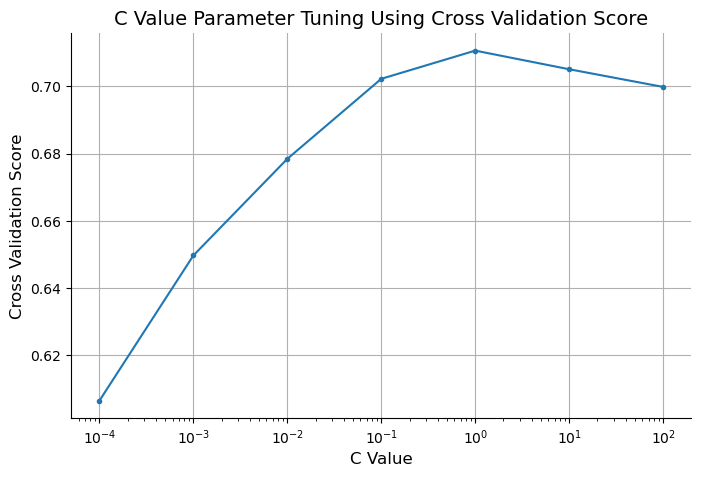

The best model has C = 1


In [20]:
# visualize
plt.figure(figsize=(8, 5))
plt.plot(C_values, cross_validation_scores,label="Cross Validation Score", marker='.')
plt.title('C Value Parameter Tuning Using Cross Validation Score', size=14)
plt.xscale('log')
plt.xlabel('C Value', size=12)
plt.ylabel('Cross Validation Score', size=12)
plt.grid()
sns.despine()
plt.show()

# C value with highest cross validation score
best_C = np.array(cross_validation_scores).argmax()

print("The best model has C =",C_values[best_C])

### Final Model 

At a `C` value of 1.0, which is the default setting, we get the highest mean cross validation score. I will use this as my final model and fit it on the original data then score on the test set.

In [21]:
# refit the best model on the original data
logit_final = LogisticRegression(C=1, random_state=1, max_iter=2000)
logit_final.fit(X_orig, y_orig)

# report the test accuracy
logit_final.score(X_test, y_test)

0.7162435407773534

The final Logistic Regression model using C = 1 returned a test score of ~72%.

Let's take a look at the regression coefficients now to see which features were strong indicators of review ratings.

In [22]:
# get regression coefficients and put into dataframe

coefs = pd.DataFrame(logit_final.coef_[0], index=X_orig.columns)
coefs.columns = ['regression coefficients']
coefs

,regression coefficients
month,0.003822
weekday,-0.008514
abv,0.255907
retired,-0.184653
Beer-to-go,0.391445
...,...
zesty,0.425356
zing,-0.163377
zip,0.135451
zippy,0.202367


The regression coefficeints are not sorted in the dataframe, so I will extract the top 20 positive features as well as the top 20 negative features and visualize them side by side.

In [23]:
# get top 20 positive coefficients

top_pos_coefs = coefs.sort_values('regression coefficients', ascending = False).head(20)
top_pos_coefs

,regression coefficients
delicious,3.815710
perfect,3.553545
great,3.403254
excellent,3.007134
fantastic,2.975335
rich,2.780020
clean,2.583485
love,2.507885
amazing,2.480495
dank,2.452954


In [24]:
# get top 20 negative coefficients

top_neg_coefs = coefs.sort_values('regression coefficients', ascending = False).tail(20)
top_neg_coefs

,regression coefficients
meh,-1.677934
odd,-1.681707
infected,-1.721158
little,-1.742615
flat,-1.746885
bit,-1.749544
tea,-1.751317
nothing,-1.793939
weird,-1.822223
need,-1.881175


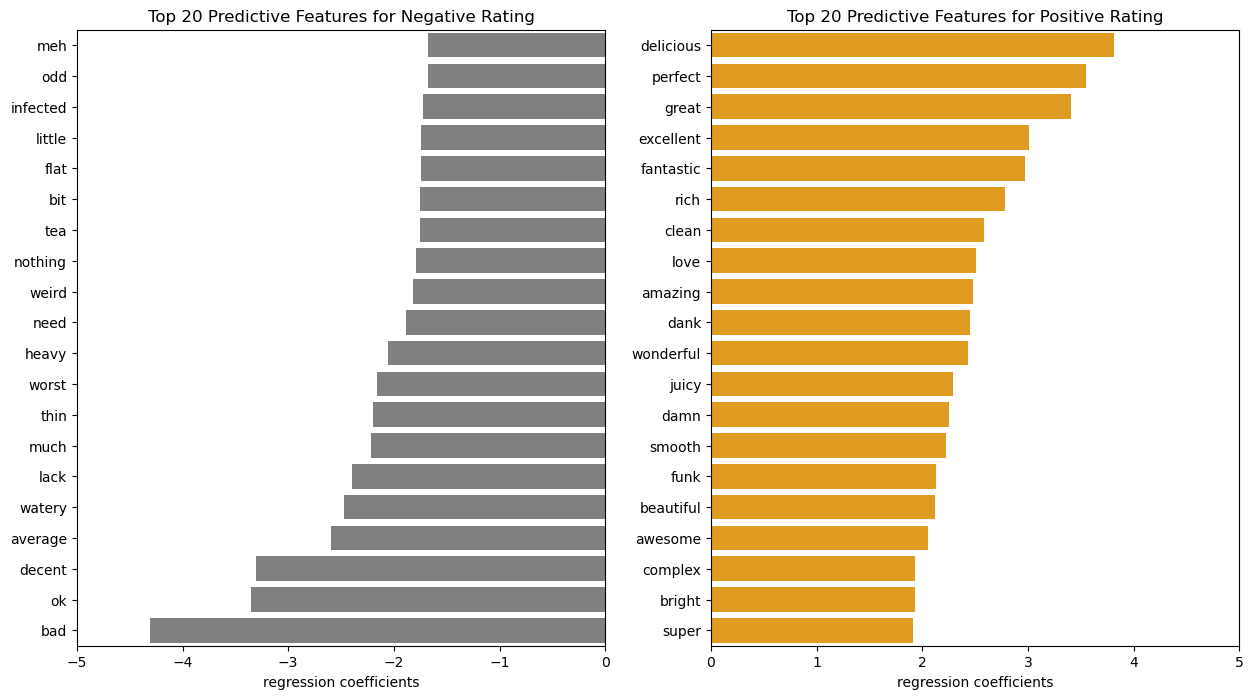

In [25]:
# visualize

plt.subplots(1, 2, figsize=(15,8))

plt.subplot(1, 2, 1)
sns.barplot(x=top_neg_coefs['regression coefficients'], y=top_neg_coefs.index, color='grey')
plt.xlim(-5, 0)
plt.title('Top 20 Predictive Features for Negative Rating')

plt.subplot(1, 2, 2)
sns.barplot(x=top_pos_coefs['regression coefficients'], y=top_pos_coefs.index, color='orange')
plt.xlim(0, 5)
plt.title('Top 20 Predictive Features for Positive Rating')

plt.show()

As can be seen from the visualization above, the words that are positively correlated with review ratings are intuitive and make a lot of sense. The top 5 being "delicious", "perfect", "great", "excellent", and "fantastic". Similarly, the negative words also make sense, such as "meh", "odd", "infected", "little", and "flat".

### Confusion Matrix

Besides looking at the accuracy score of the model, we should look at other measurements of performance as well using a confusion matrix. This will give us the combinations of predicted and actual values, which can be used to calculate the precision and recall scores for the model.

In [26]:
# import confusion matrix tools
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

# get review class predictions
y_pred = logit_final.predict(X_test)

# generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# label rows and columns
cf_df = pd.DataFrame(cf_matrix, columns=['Predicted Bad', 'Predicted Good'], index=['True Bad', 'True Good'])

display(cf_df)

,Predicted Bad,Predicted Good
True Bad,1768,1759
True Good,767,4608


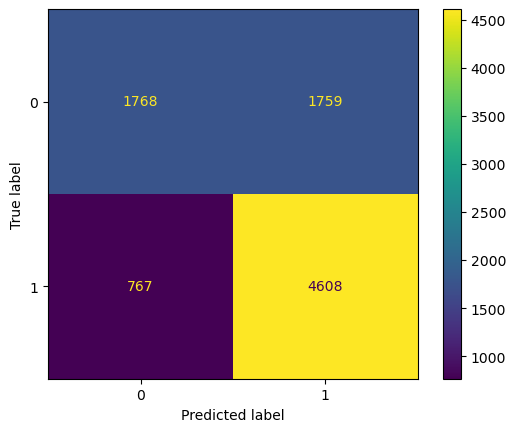

In [27]:
# visualize with heatmap

plot_confusion_matrix(logit_final, X_test, y_test, cmap='viridis')
plt.show()

In [47]:
# calculate percentage of false positives and false negatives

print(f"False Positives (Type I error): {round(1759/8902, 2)*100}%")
print(f"False Negatives (Type II error): {round(767/8902, 2)*100}%")

False Positives (Type I error): 20.0%
False Negatives (Type II error): 9.0%


Looking at the confusion matrix, we can see that:
* **True Negative (TN)**: 1,768 reviews were correctly predicted as bad
* **False Positive (FP)**: 1,759 reviews were predicted as good but were actually bad
* **False Negative (FN)**: 767 reviews were predicted as bad but were actually good
* **True Positive (TP)**: 4,608 reviews were correctly classified as good

We can take a look at the precision, recall, and f1-score of the model by getting the classification report.

In [29]:
# import classification report tool
from sklearn.metrics import classification_report

# get classification report
classification_report = classification_report(y_test, y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.70      0.50      0.58      3527
           1       0.72      0.86      0.78      5375

    accuracy                           0.72      8902
   macro avg       0.71      0.68      0.68      8902
weighted avg       0.71      0.72      0.71      8902



Below is a summary of the logistic regression model metrics:

- With 4,608 true positives and 1,768 true negatives, the model accuracy is **~72%**
- False positives (Type I errors) make up **~20%** of the predictions
- False negatives (Type II errors) make up **~9%** of the predictions
- Precision is **72%**, which means that 72% of the reviews that were predicted as good were actually good
- Recall is **86%**, which means that of all the good reviews, 86% were correctly predicted as good
- F1 score is the harmonic mean of the precision and recall scores and for this model it is **78%**

Recall that our target variable, the `rating`, was imbalanced and had a higher proportion of good (60%) vs. bad (40%) reviews. In this case, accuracy is not the ideal metric to evaluate our model. We are more interested in the positive class (i.e. the good reviews), so I would consider the `f1` score as the best metric for model evaluation, which in this case is **78%**.

---

## Decision Tree

I will now move on to a Decision Tree model. Because it is not a distance-based algorithm, the data does not need to be scaled, and I can proceed to a vanilla model using the default parameters (`max_depth=none`).

### Model v.01

In [30]:
# instantiate Decision Tree model
DT_01 = DecisionTreeClassifier()

# fit model to original train set
DT_01.fit(X_train, y_train)

# get accuracy scores 
DT_01_train_score = DT_01.score(X_train, y_train)
DT_01_val_score = DT_01.score(X_validation, y_validation)

print(f'Train accuracy: {round(DT_01_train_score, 2)}')
print(f'Validation accuracy: {round(DT_01_val_score, 2)}')

Train accuracy: 0.98
Validation accuracy: 0.62


Model v.01 got a train accuracy of 98% and a validation accuracy of 62%. This is extremely overfit (36% difference). Let's try to optimize the `max_depth` parameter, which is the depth we want the tree to grow, where the higher the depth, the more likely the model will overfit. Again, instead of using `GridSearchCV` due to computational limitations, I will use a 5-fold cross validation to choose the `max_depth` that returns the highest cross validation score.

In [31]:
# empty list to store cross validation scores
cross_validation_scores_DT = []

# set range of max_depth values
depths = range(1, 11)

# do cross validation looping through different max_depth values
for max_depth in depths:
    DT_model = DecisionTreeClassifier(max_depth=max_depth, random_state=1)
    
    # cross validation score (mean of scores from all folds)
    cv_score_DT = np.mean(cross_val_score(DT_model, X_train, y_train, cv = 5))
    
    # evaluate by appending scores
    cross_validation_scores_DT.append(cv_score_DT)

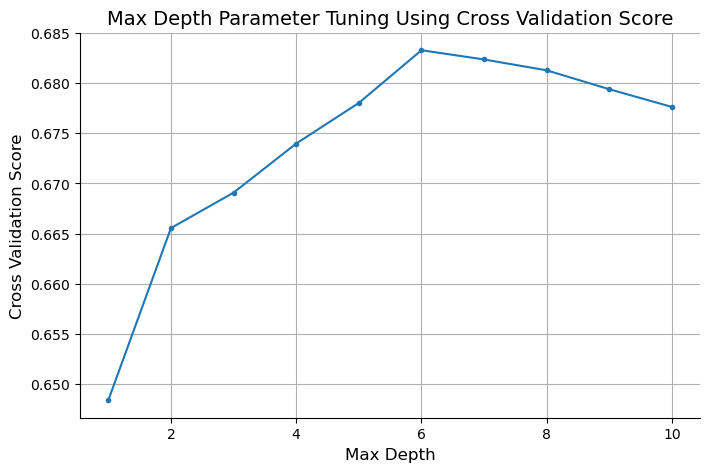

In [32]:
# visualize
plt.figure(figsize=(8, 5))
plt.plot(depths, cross_validation_scores_DT, label="Cross Validation Score", marker='.')
plt.title('Max Depth Parameter Tuning Using Cross Validation Score', size=14)
plt.xlabel('Max Depth', size=12)
plt.ylabel('Cross Validation Score', size=12)
plt.grid()
sns.despine()
plt.show()

At `max_depth=6` is where we see the highest validation score. Let's test this on our second iteration.

### Model v.02 

In [33]:
# instantiate Decision Tree model
DT_02 = DecisionTreeClassifier(max_depth=6)

# fit model to original train set
DT_02.fit(X_train, y_train)

# get accuracy scores 
DT_02_train_score = DT_02.score(X_train, y_train)
DT_02_val_score = DT_02.score(X_validation, y_validation)

print(f'Train accuracy: {round(DT_02_train_score, 2)}')
print(f'Validation accuracy: {round(DT_02_val_score, 2)}')

Train accuracy: 0.7
Validation accuracy: 0.67


The model is definitely much less overfit now and we have a train accuracy of 70% and a validation accuracy of 67%. I will use this as the final model and fit it on the original dataset then scored on the test set.

### Final Model

In [34]:
# refit the best model on the original data
DT_02.fit(X_orig, y_orig)

# report the test accuracy
DT_02.score(X_test, y_test)

0.6822062457874635

The final model returned an accuracy of 68% on the test data. Let's take a look at the important features using `feature_importances_`. 

In [35]:
# get important features for DT model and put into dataframe
features_DT = list(zip(X_orig.columns, DT_02.feature_importances_))
features_important_DT = pd.DataFrame(features_DT, columns = ['features', 'importance']).sort_values(by='importance', ascending=False)

# extract the top 20 features
features_important_DT_20 = features_important_DT.head(20)
features_important_DT_20

,features,importance
2,abv,0.637286
11,Rotating,0.075428
27,wild/sour,0.066732
10,Limited (brewed once),0.038635
6,Eatery,0.027277
4,Beer-to-go,0.026070
20,pale ale,0.021260
15,IPA,0.017966
1451,great,0.011386
24,stout,0.010613


We have our top 20 important features that can be visualized in a graph.

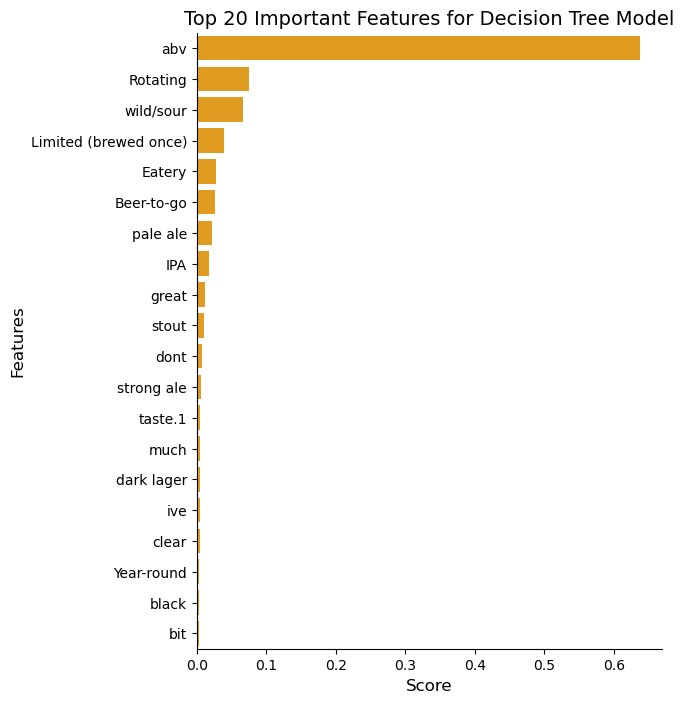

In [36]:
# visualize

plt.figure(figsize=(6, 8))
sns.barplot(x=features_important_DT_20['importance'], y=features_important_DT_20['features'], color='orange')
plt.xlabel('Score', size=12)
plt.ylabel('Features', size=12)
plt.title('Top 20 Important Features for Decision Tree Model', size=14)
sns.despine()
plt.show()

It appears that the ABV is a very important feature in our Decision Tree model as it outranked the rest of the features by more than six times. The other important features are "rotating", "wild/sour", "limited (brewed once)", and "eatery".

### Confusion Matrix

Let's take a look at the confusion matrix for this model.

In [37]:
# get review class predictions
y_pred_DT = DT_02.predict(X_test)

# generate confusion matrix
cf_matrix_DT = confusion_matrix(y_test, y_pred_DT)

# label rows and columns
cf_df_DT = pd.DataFrame(cf_matrix_DT, columns=['Predicted Bad', 'Predicted Good'], index=['True Bad', 'True Good'])

display(cf_df_DT)

,Predicted Bad,Predicted Good
True Bad,1647,1880
True Good,949,4426


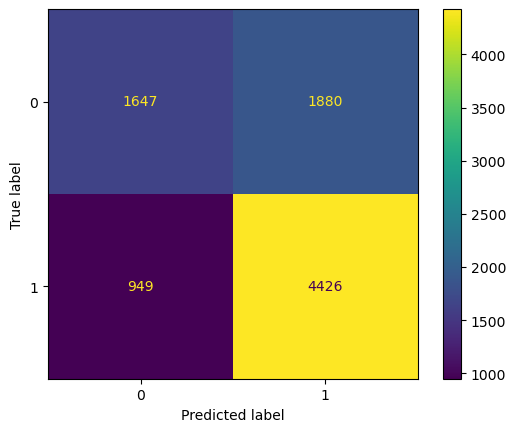

In [38]:
# visualize with heatmap
plot_confusion_matrix(DT_02, X_test, y_test, cmap='viridis')
plt.show()

In [39]:
# calculate percentage of false positives and false negatives

print(f"False Positives (Type I error): {round(1880/8902, 2)*100}%")
print(f"False Negatives (Type II error): {round(949/8902, 2)*100}%")

False Positives (Type I error): 21.0%
False Negatives (Type II error): 11.0%


Looking at the confusion matrix, we can see that:
* **True Negative (TN)**: 1,647 reviews were correctly predicted as bad
* **False Positive (FP)**: 1,880 reviews were predicted as good but were actually bad
* **False Negative (FN)**: 949 reviews were predicted as bad but were actually good
* **True Positive (TP)**: 4,426 reviews were correctly classified as good

We can take a look at the precision, recall, and f1-score of the model by getting the classification report.

In [40]:
# import classification report tool
from sklearn.metrics import classification_report

# get classification report
classification_report_DT = classification_report(y_test, y_pred_DT)
print(classification_report_DT)

              precision    recall  f1-score   support

           0       0.63      0.47      0.54      3527
           1       0.70      0.82      0.76      5375

    accuracy                           0.68      8902
   macro avg       0.67      0.65      0.65      8902
weighted avg       0.68      0.68      0.67      8902



Below is a summary of the Decision Tree model metrics:

- Accuracy is **68%**
- False positives (Type I errors) make up **~21%** of the predictions
- False negatives (Type II errors) make up **~11%** of the predictions
- Precision is **70%**
- Recall is **82%**
- F1 score is **76%**

For the same reasons mentioned in the Logistic Regression metric evaluation above, I will consider the `f1` metric to evaluate our Decision Tree model, which is **76%**.

---

## XGBoost

The last model that I will test is XGBoost. Because this is also not a distance-based algorithm, the data does not need to be scaled. The first iteration will be using the default parameters (`n_estimators=100` and `max_depth=6`).

### Model v.01 

In [41]:
# instantiate
XGB_01 = XGBClassifier()

# fit
XGB_01.fit(X_train, y_train)
    
# model performance with train and validation data
XGB_01_train_score = XGB_01.score(X_train, y_train)
XGB_01_val_score = XGB_01.score(X_validation, y_validation)

print(f'Train accuracy: {round(XGB_01_train_score, 2)}')
print(f'Validation accuracy: {round(XGB_01_val_score, 2)}')

Train accuracy: 0.78
Validation accuracy: 0.71


The first vanilla XGBoost model got a train accuracy of 78% and a validation accuracy of 71%, which is a bit overfit. Due to the heavier computational power required to run an XGBoost model, I will iterate through ranges of `n_estimators` and `max_depth` values on our train data and testing on the validation subset rather than using a 5-fold cross validation to optimize the hyperparameters.

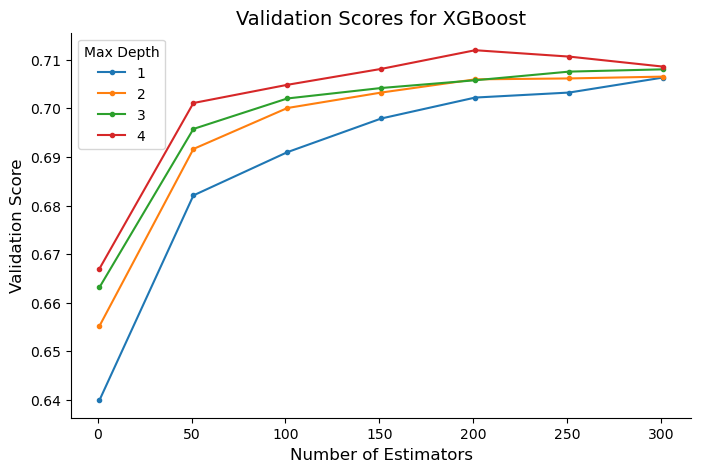

In [48]:
# visualize scores for XGB with max_depth range of 1-5 (since at default 6 the model was overfit)
# and n_estimators of 10-350 (increments of 50)

plt.figure(figsize=(8, 5))

# range of max_depth
for max_depth in np.arange(1, 5):
    
    # store validation scores in a list
    scores = list()
    
    # range of n_estimators
    for n_est in np.arange(1, 350, 50):

        # instantiate XGB
        XGB = XGBClassifier(n_estimators=n_est, max_depth=max_depth)

        # fit to train data
        XGB.fit(X_train, y_train)

        # calculate validation score and append
        scores.append(XGB.score(X_validation, y_validation))
        
    plt.plot(np.arange(1, 350, 50), scores, label=max_depth, marker='.')

plt.xlabel('Number of Estimators', size=12)
plt.ylabel('Validation Score', size=12)
plt.legend(title='Max Depth')
plt.title('Validation Scores for XGBoost', size=14)
sns.despine()
plt.show()

### Model v.02

Based on the results above, we can see that at `max_depth=4` and `n_estimators=200` we got the highest validation score. We will try this first. 

In [43]:
# instantiate
XGB_02 = XGBClassifier(n_estimators=200, max_depth=4)

# fit
XGB_02.fit(X_train, y_train)
    
# model performance with train and validation data
XGB_02_train_score = XGB_02.score(X_train, y_train)
XGB_02_val_score = XGB_02.score(X_validation, y_validation)

print(f'Train accuracy: {round(XGB_02_train_score, 4)}')
print(f'Validation accuracy: {round(XGB_02_val_score, 4)}')

Train accuracy: 0.7731
Validation accuracy: 0.7123


The train accuracy for model v.02 is 77% and the validation accuracy is 71%. There is still overfitting here (6%), which tells us that the `max_depth` may be too high. Since the difference in validation scores between `max_depth=4` and `max_depth=4` is quite minimal, I will opt to test `max_depth=3`. The goal will be to reduce the difference between train and validation accuracies to within 4%.

### Model v.03

For `max_depth=3`, the highest validation score is with `n_estimators=250`, so I will try that next.

In [44]:
# instantiate
XGB_03 = XGBClassifier(n_estimators=250, max_depth=3)

# fit
XGB_03.fit(X_train, y_train)
    
# model performance with train and validation data
XGB_03_train_score = XGB_03.score(X_train, y_train)
XGB_03_val_score = XGB_03.score(X_validation, y_validation)

print(f'Train accuracy: {round(XGB_03_train_score, 4)}')
print(f'Validation accuracy: {round(XGB_03_val_score, 4)}')

Train accuracy: 0.7626
Validation accuracy: 0.7075


The train accuracy for model v.03 is 76% vs. the validation accuracy of 71%, which is still a bit overfit. I will try a lower number of estimators now for v.04.

### Model v.04 

In [45]:
# instantiate
XGB_04 = XGBClassifier(n_estimators=150, max_depth=3)

# fit
XGB_04.fit(X_train, y_train)
    
# model performance with train and validation data
XGB_04_train_score = XGB_04.score(X_train, y_train)
XGB_04_val_score = XGB_04.score(X_validation, y_validation)

print(f'Train accuracy: {round(XGB_04_train_score, 4)}')
print(f'Validation accuracy: {round(XGB_04_val_score, 4)}')

Train accuracy: 0.75
Validation accuracy: 0.7039


Model v.04 got a train accuracy of 75% and a validation accuracy of 70%; still over 4% difference. I will try the next step down in `n_estimators`. 

###  Model v.05

In [46]:
# instantiate
XGB_05 = XGBClassifier(n_estimators=100, max_depth=3)

# fit
XGB_05.fit(X_train, y_train)
    
# model performance with train and validation data
XGB_05_train_score = XGB_05.score(X_train, y_train)
XGB_05_val_score = XGB_05.score(X_validation, y_validation)

print(f'Train accuracy: {round(XGB_05_train_score, 4)}')
print(f'Validation accuracy: {round(XGB_05_val_score, 4)}')

Train accuracy: 0.7381
Validation accuracy: 0.7016


With `n_estimators=100`, model v.05 got a train accuracy of 74% and a validation accuracy of 70%. This is within the range we're looking for without sacrificing the score, so this is the XGBoost model I will use as the final one. I will now fit it on the original data and get a test accuracy score.

### Final Model

In [49]:
# refit the best model on the original data
XGB_final = XGBClassifier(n_estimators=100, max_depth=3)
XGB_final.fit(X_orig, y_orig)

# report the test accuracy
XGB_final.score(X_test, y_test)

0.7133228487980229

The final model scored a test accuracy of 71%.

Like the Decision Tree model, we can get the important features for the XGBoost model. I will choose to choose the important features based on 'gain', which is the increase in accuracy brought by a feature to the branches it is on. A higher gain value when compared to another feature implies that it is more important for generating a prediction<sup><a href='#footnotes'>1</a></sup>.

In [50]:
# get important features for XGB model (by 'gain')

feature_important = XGB_final.get_booster().get_score(importance_type='gain')
features = list(feature_important.keys())
importance = list(feature_important.values())

# put into dataframe and take the top 20
important_features = pd.DataFrame(data=importance, index=features, columns=['score']).sort_values(by = 'score', ascending=False)
important_features_20 = important_features.head(20)

In [56]:
# check

important_features_20

,score
abv,149.852811
Limited (brewed once),140.233323
Rotating,139.076052
wild/sour,109.671598
Beer-to-go,96.776898
Eatery,62.743077
decent,55.395364
much,55.228271
pale lager,53.250833
specialty,53.139793


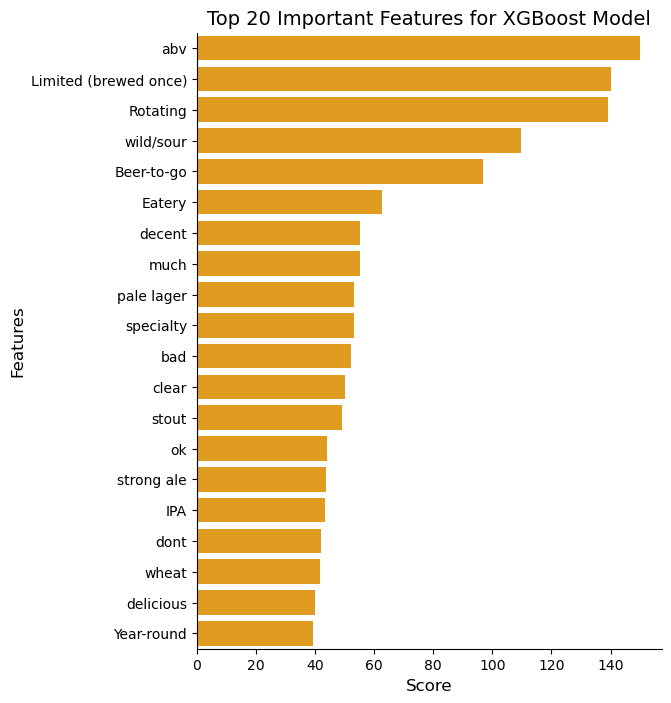

In [51]:
# visualize

plt.figure(figsize=(6, 8))
sns.barplot(x=important_features_20['score'], y=important_features_20.index, color='orange')
plt.xlabel('Score', size=12)
plt.ylabel('Features', size=12)
plt.title('Top 20 Important Features for XGBoost Model', size=14)
sns.despine()
plt.show()

### Confusion Matrix

In [52]:
# get review class predictions
y_pred_XGB = XGB_final.predict(X_test)

# generate confusion matrix
cf_matrix_XGB = confusion_matrix(y_test, y_pred_XGB)

# label rows and columns
cf_df_XGB = pd.DataFrame(cf_matrix_XGB, columns=['Predicted Bad', 'Predicted Good'], index=['True Bad', 'True Good'])

display(cf_df_XGB)

,Predicted Bad,Predicted Good
True Bad,1762,1765
True Good,787,4588


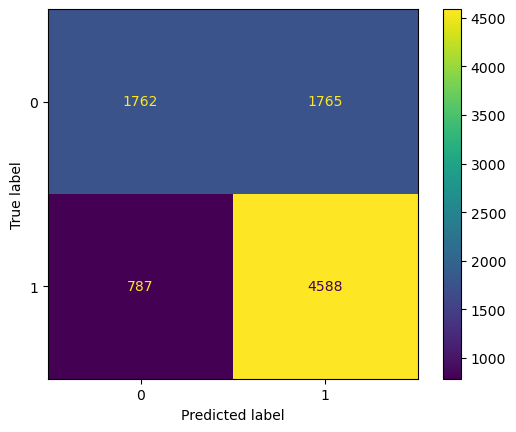

In [53]:
# visualize with heatmap
plot_confusion_matrix(XGB_final, X_test, y_test, cmap='viridis')
plt.show()

In [54]:
# calculate percentage of false positives and false negatives

print(f"False Positives (Type I error): {round(1765/8902, 2)*100}%")
print(f"False Negatives (Type II error): {round(787/8902, 2)*100}%")

False Positives (Type I error): 20.0%
False Negatives (Type II error): 9.0%


Looking at the confusion matrix, we can see that:
* **True Negative (TN)**: 1,762 reviews were correctly predicted as bad
* **False Positive (FP)**: 1,765 reviews were predicted as good but were actually bad
* **False Negative (FN)**: 787 reviews were predicted as bad but were actually good
* **True Positive (TP)**: 4,588 reviews were correctly classified as good

Let's look at the precision, recall, and f1-score of the model by getting the classification report.

In [55]:
# import classification report tool
from sklearn.metrics import classification_report

# get classification report
classification_report_XGB = classification_report(y_test, y_pred_XGB)
print(classification_report_XGB)

              precision    recall  f1-score   support

           0       0.69      0.50      0.58      3527
           1       0.72      0.85      0.78      5375

    accuracy                           0.71      8902
   macro avg       0.71      0.68      0.68      8902
weighted avg       0.71      0.71      0.70      8902



Below is a summary of the XGBoost model metrics:

- Accuracy is **~71%**
- False positives (Type I errors) make up **~20%** of the predictions
- False negatives (Type II errors) make up **~9%** of the predictions
- Precision is **72%**
- Recall is **85%**
- F1 score **78%**

---

## Model Evaluation

Here is a table comparing the metrics of all models side by side:

|  | **Logistic Regression** | **Decision Tree** | **XGBoost** | 
| :- | -: | -:  | -: |
| Accuracy | 72% | 68% | 71% |
| Precision | 72% | 70% | 72% |
| Recall | 86% | 82% | 85% |
| **F1 Score** | **78%** | **76%** | **78%** |

Both of the Logistic Regression and XGBoost models had the same percentage of Type I and Type II errors, and the accuracy, precision, recall, and f1 scores are very similar, with the Logistic Regression model having slightly higher accuracy and recall scores. However, it should be noted that due to restrictions with computational power, I was not able to perform a 5-fold cross validation on the XGBoost model to fully optimize the hyperparameters. The Decision Tree model performed the most poorly in all areas.

We can also take a look at the important features for each model:

| **Logistic Regression** | **Decision Tree** | **XGBoost** | 
| :-------- | :-------------------- | :-------- |
| delicious | abv                   | abv | 
| perfect   | rotating              | limited (brewed once) |
| great     | wild/sour             | rotating |
| excellent | limited (brewed once) | wild/sour |
| fantastic | eatery                | beer-to-go | 
| rich      | beer-to-go            | eatery |
| clean     | pale ale              | decent |
| love      | IPA                   | much | 
| amazing   | great                 | pale lager |
| dank      | stout                 | specialty |
| wonderful | don't                 | bad | 
| juicy     | strong ale            | clear |
| damn      | taste                 | stout |
| smooth    | much                  | ok | 
| funk      | dark lager            | strong ale |
| beautiful | I've                  | IPA |
| awesome   | clear                 | don't | 
| complex   | year-round            | wheat |
| bright    | black                 | delicious |
| super     | bit                   | year-round |

The top 6 features for both the Decision Tree and XBGoost models ("abv", "limited (brewed once)", "rotating", "wild/sour", "beer-to-go", and "eatery") are the same, just in different order. The other words that overlap between the two models are "IPA", "stout", "strong ale", "much", "clear", and "year-round". In total, 60% of the words overlapped and most of them were nouns that tell us more about the general categorical characteristics of a beer, such as the style, ABV content, and how frequently it is produced. On the other hand, we can see that all of the features in our Logistic Regression model were descriptive words that tell us about the reviewer's sentiment towards to beer, such as "delicious", "perfect", "great", "excellent", and "fantastic."

As discussed earlier, the metric that should be used to evaluate the models is the `f1` score, and although both the Logistic Regression and XGBoost models got an `f1` score of 78%, I would consider Logistic Regression as the better model for our prediction task as it requires the least computational power. However, if we want to look at which characteristics result in higher ratings, we can use the important features in the XGBoost and Decision Tree models, which tell us that it's beers with higher ABV levels, more limited availability, and are wild/sours, IPAs, and stouts.

---

## Summary

After performing Logistic Regression, Decision Tree, and XGBoost models to predict whether a review rating is good or bad, the model that performed the best overall is the Logistic Regression model. It had the highest scores for each metric (accuracy, precision, recall, and `f1`) but the metric that is most relevant for this dataset is the `f1` score due to an imbalance in the target `rating` variable, where there were 60% good reviews and 40% bad reviews.

From our best Logistic Regression model, which scored an `f1` of 78%, we extracted the top 20 positive indicators of a good review and the top 20 negative indicators of a bad review. They were mostly words that describe the reviewers' opinions of the beers rather than categorical, and all of the words, both negative and positive, were intuitive and made sense. However, the important features from the XGBoost and Decision Tree models were more categorical and suggest that stouts, IPAs, and wild/sour beers as well as those with higher ABV and more limited availability (e.g. on a rotating basis or only brewed once) tend to result in higher ratings.

By using these models, beer businesses can evaluate customers' opinions and attitudes towards their products and gauge what their overall brand perceptions of the company may be. Using this information, businesses can create products that meet market trends and tailored to their customers' preferences, as well as target their marketing to those that are more relevant.

In the next notebook, `beer_clustering`, I will perform K-Means Clustering on the vectorized text reviews to see if we can find any interesting groups or patterns. It will use the same dataset that was read in this notebook, `beer_sample_cleaned.csv`.

---

<a id='footnotes'></a>
### Footnotes

1. <a href="https://towardsdatascience.com/be-careful-when-interpreting-your-features-importance-in-xgboost-6e16132588e7">Toward Science</a>